# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Illustrate the Edgeworthbox**

In order to illustrate the Edgeworthbox given the sets C, firstly we defined the model, the parameters, initial and total endowments as well as the utility and demand functions for agent A and B. 

Afterwards we checked for market clearing and set up the conditions for illustration the Edgeworthbox given set C.

In the codebox underneath this, we start of by importing the ExchangeEconomyClass defined in the py.file. We use this to plot the Edgeworthbox. 

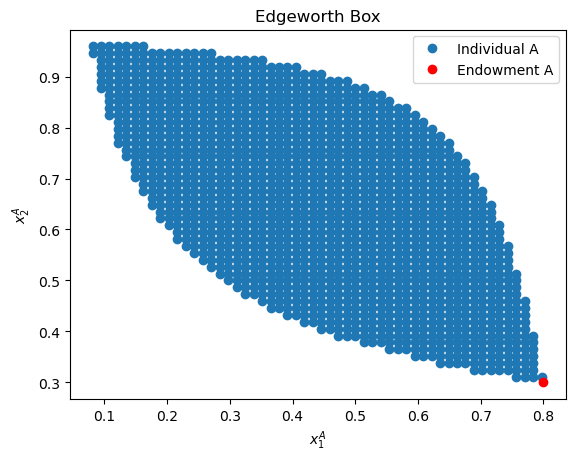

In [10]:
#import the class ExchangeEconomyClass from the file inauguralproject.py
from inauguralproject import ExchangeEconomyClass

# Create an instance of the class ExchangeEconomyClass
model = ExchangeEconomyClass()

# Plot the Edgeworth box
economy.plot_edgeworth_box(75)

# Question 2

Explain your code and procedure

In [23]:
# Calculating the errors 
from inauguralproject import ExchangeEconomyClass
exchange_economy = ExchangeEconomyClass()
exchange_economy.calc_eps(N=75)

For p1 = 0.5, eps1 = 0.533333333333333, eps2 = 0.46666666666666656
For p1 = 0.5533333333333333, eps1 = 0.42409638554216866, eps2 = 0.3831325301204822
For p1 = 0.58, eps1 = 0.3770114942528735, eps2 = 0.3471264367816096
For p1 = 0.6066666666666667, eps1 = 0.334065934065934, eps2 = 0.3142857142857145
For p1 = 0.6333333333333333, eps1 = 0.29473684210526296, eps2 = 0.2842105263157897
For p1 = 0.66, eps1 = 0.2585858585858585, eps2 = 0.2565656565656569
For p1 = 0.6866666666666666, eps1 = 0.22524271844660176, eps2 = 0.23106796116504857
For p1 = 0.7133333333333334, eps1 = 0.19439252336448576, eps2 = 0.20747663551401874
For p1 = 0.74, eps1 = 0.16576576576576557, eps2 = 0.18558558558558558
For p1 = 0.7666666666666666, eps1 = 0.13913043478260867, eps2 = 0.16521739130434798
For p1 = 0.7933333333333333, eps1 = 0.11428571428571416, eps2 = 0.14621848739495813
For p1 = 0.8200000000000001, eps1 = 0.09105691056910559, eps2 = 0.12845528455284572
For p1 = 0.8466666666666667, eps1 = 0.06929133858267716, eps

# Question 3

Explain your code and procedure

In [ ]:
# code

ADD CONCISE CONLUSION.

# Question 4

# Question 5

# Question 6

# Question 7

# Question 8